# Sentiment Analysis

## Part 1: Naive Bayes

In this project, I did a sentiment analysis for movie review. Mutinomial NB will be used in this Notebook.

### Get Familiar with dataset

In [1]:
import pandas as pd
import nltk
import string

In [2]:
# Load csv file into DataFrame
train = pd.read_csv('train.csv')

In [3]:
train?

In [3]:
print("sentiment  :", train.sentiment[0])
print("reviewText :", train.reviewText[0])   # .sentiment, .reviewText是该数据的两列

sentiment  : pos
reviewText : For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.


In [5]:
train.shape

(25000, 2)

In [4]:
# Get a sample (head) of the data frame
train.head()

,reviewText,sentiment
0,For a movie that gets no respect there sure ar...,pos
1,Bizarre horror movie filled with famous faces ...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",pos
3,It's a strange feeling to sit alone in a theat...,pos
4,"You probably all already know this by now, but...",pos


In [7]:
# Statics on tags
train.sentiment.value_counts()  # see how many pos and neg in sentiment feature

pos    12500
neg    12500
Name: sentiment, dtype: int64

See [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/10min.html?highlight=data%20frame) for more details.

### Load Data

In [5]:
def load_data(path):
    data = pd.read_csv(path)
    x = data['reviewText'].tolist()  # 该列数据转化成list
    y = data['sentiment'].tolist()
    return x, y

In [6]:
train_x, train_y = load_data('train.csv')
test_x, test_y = load_data('test.csv')

In [7]:
print('training size:', len(train_x))
print('test size:', len(test_x))

training size: 25000
test size: 25000


### Preprocessing

In [9]:
lemmatizer = nltk.WordNetLemmatizer()  # 词性还原
stopwords = nltk.corpus.stopwords.words('english')  # 去掉stopwords，可能出现的问题：I like it vs. I don't like it, don't 会被去掉
transtbl = str.maketrans(string.punctuation, ' ' * len(string.punctuation)) # translate table: 标点符号，用同等长度的空格取代

In [12]:
# nltk.download()  # to run previous chunk, need to download

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
'ababc'.translate(str.maketrans('abc','def')) # str就是Python 2 中的module string

'dedef'

In [17]:
# Yet a more compact way to write the code
def preprocessing(line: str) -> str:   # python 3 中特有，对于函数输入类型和输出类型的标记
    line = line.replace('<br />', '').translate(transtbl)
    
    tokens = [lemmatizer.lemmatize(t.lower(),'v')  # What to put in the list
              for t in nltk.word_tokenize(line)    # Where 
              if t.lower() not in stopwords]       # If
    
    return ' '.join(tokens)

In [18]:
test_str = "I bought several books yesterday<br /> and I really love them!"
preprocessing(test_str)

'buy several book yesterday really love'

In [ ]:
nltk.download()

In [16]:
# Preprocess all data
train_x = [preprocessing(x) for x in train_x]
test_x = [preprocessing(x) for x in test_x]

In [19]:
# Yet a more modern way to write code
train_x = list(map(preprocessing, train_x))
test_x = list(map(preprocessing, test_x))

In [20]:
from my_utils import print_progress

def preprocess_dataset(data, name=''):
    out = []
    m = len(data)
    
    for i, x in enumerate(data):
        out.append(preprocessing(x))
        print_progress(bar_length=50, decimals=0, iteration=i + 1, total=m, prefix='Preprocessing %s:' % name)
    
    print('Done.')
    return out

In [21]:
train_x = preprocess_dataset(train_x, name='training data')
test_x = preprocess_dataset(test_x, name='test data')

Preprocessing training data: |==================================================| 100% 
Done.
Preprocessing test data: |==================================================| 100% 
Done.


### Some modern functions to introduce
- map
- reduce
- filter

They are very useful when running the project on a cluster or distributed compute system like Hadoop or Spark.

In [22]:
# Some useful modern functions
l = [0,1,2,3,4,5,6,7,8,9]

# Map
def square(x: int) -> int:
    return x * x

print( list(map(square, l)) )  # 需要input一个函数和一个可迭代的东西(e.g., list),map就可以把list中每一个元素都用函数做出映射

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [23]:
# Using lambda function
print( list(map(lambda x: x * x, l)) )

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [24]:
# Reduce
# reduce function is moved to functools
def add(x: int, y: int) -> int:
    return x + y

import functools
rst = functools.reduce(add, l)

print ("reduce", l, "by add:", rst)  #每次都把前两个元素相加，然后update list，所以list的长度在不断减小

reduce [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] by add: 45


In [25]:
# Using lambda function
# reduce is moved to functools in Python 3
rst = functools.reduce(lambda x, y: x + y, l)
print ("reduce", l, "by add:", rst)

reduce [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] by add: 45


In [26]:
rst = functools.reduce(lambda x, y: min(x, y), l)
print ("reduce", l, "by min:", rst)

reduce [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] by min: 0


In [27]:
# Filter
# Much faster than loop, similar with list comprehension
list(filter(lambda x: x < 5, l))

[0, 1, 2, 3, 4]

### Build Vocabulary

In [ ]:
# Push all tokens and compute frequency of words
all_words = []
for line in train_x:
    words = line.split()
    for w in words:
        all_words.append(w)
        
voca = nltk.FreqDist(all_words)

In [28]:
# Yet another more python-y style
all_words = [w for line in train_x for w in line.split()]
voca = nltk.FreqDist(all_words)  # 得到每个词出现次数，从高到低排列

In [29]:
print(voca)

<FreqDist with 65063 samples and 3018076 outcomes>


In [30]:
voca.most_common(10) # 最多的前10个词

[('film', 48170),
 ('movie', 43912),
 ('one', 26747),
 ('make', 23538),
 ('like', 22335),
 ('see', 20773),
 ('get', 18108),
 ('time', 16143),
 ('good', 15124),
 ('character', 14153)]

In [31]:
topwords = [fpair[0] for fpair in list(voca.most_common(10000))]

### Vectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer  # 专门做bag of words 以及 ngram; BoW其实就是ngram的n取1
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
cnt_vec = CountVectorizer()  #如果要用ngram为3，则CountVectorizer(ngram_range=(1, 3))
cnt_vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
# Create our BAG of words (specify words we care about)
cnt_vec.fit(topwords)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

#### Tf–idf term weighting

In [35]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [38]:
# Since CountVectorizer and TfidTransformer are often used together
# There is a class named TfidfVectorizer that combine these two steps
tf_vec = TfidfVectorizer()  # 本质是串联前两步
tf_vec.fit(topwords)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

### Feature Extraction

In [41]:
# Extract features from training set
# Vocabulary is from topwords
train_features = tf_vec.transform(train_x)

In [42]:
# Array[n_train_data * n_features]
train_features.shape

(25000, 9966)

In [43]:
# Extract features from test set
test_features = tf_vec.transform(test_x)

In [44]:
test_features.shape

(25000, 9966)

### [Multinomial NB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

The multinomial Naive Bayes classifier is suitable for **classification with discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
mnb_model = MultinomialNB()  # 用于discrete features
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
# Train Model
import time

start = time.time()
mnb_model.fit(train_features, train_y)
end = time.time()

print("Multinomial NB model trained in %f seconds" % (end-start))

Multinomial NB model trained in 0.038604 seconds


In [48]:
# Predict
pred = mnb_model.predict(test_features)
print(pred)

['pos' 'pos' 'pos' ..., 'neg' 'neg' 'neg']


In [49]:
# Metrics
# metrics.accuracy_score(y_true, y_pred)
from sklearn import metrics
accuracy = metrics.accuracy_score(pred,test_y)
print(accuracy)

0.84332


In [50]:
# Use keyword arguments to set arguments explicitly
print(metrics.classification_report(y_true=test_y, y_pred=pred))

             precision    recall  f1-score   support

        neg       0.82      0.88      0.85     12500
        pos       0.87      0.81      0.84     12500

avg / total       0.84      0.84      0.84     25000



In [51]:
# Example from sklearn documentation
# recall永远是基于true结果的，precision是基于pred结果的
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(metrics.classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



### Predict new sentences

In [52]:
# Predict a new sentence
# vectorizer needs to be pre-fitted
# At the end of the project, the function signature should be something like:
# predict_new(sentent: str, vec, model) -> str

def predict_new(sentence: str):
    sentence = preprocessing(sentence)
    features = tf_vec.transform([sentence])
    pred = mnb_model.predict(features)
    return pred[0]

In [53]:
predict_new('This looks not terrible')  # 因为not是stopword，且每个词只被单独考虑，所以无法处理负负得正的情况

'neg'

### Select Top N

In [54]:
def train_with_n_topwords(n: int, tfidf=False) -> tuple:
    topwords = [fpair[0] for fpair in list(voca.most_common(n))]
    
    if tfidf:
        vec = TfidfVectorizer()
    else:
        vec = CountVectorizer()
        
    vec.fit(topwords)
    
    # Generate feature vectors
    train_features = vec.transform(train_x)
    test_features  = vec.transform(test_x)
    
    # NB
    mnb_model = MultinomialNB()
    mnb_model.fit(train_features, train_y)
    
    # Test predict
    pred = mnb_model.predict(test_features)
    
    return metrics.accuracy_score(pred, test_y), mnb_model

In [55]:
train_with_n_topwords(500, tfidf=True)

(0.82511999999999996,
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))

In [56]:
possible_n = [500 * i for i in range(1, 20)]

cnt_accuracies = []
tfidf_accuracies = []

for i, n in enumerate(possible_n):
    cnt_accuracies.append(train_with_n_topwords(n)[0])
    print_progress(bar_length=50, decimals=0, iteration=2 * i + 1, total=2*len(possible_n), prefix='Train and verify:')
    
    tfidf_accuracies.append(train_with_n_topwords(n, tfidf=True)[0])
    print_progress(bar_length=50, decimals=0, iteration=2 * i + 2, total=2*len(possible_n), prefix='Train and verify:')

Train and verify: |==================================================| 100% 


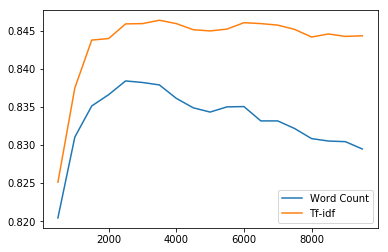

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(possible_n, cnt_accuracies, label='Word Count')
plt.plot(possible_n, tfidf_accuracies, label='Tf-idf')
plt.legend()

**Expected**:

<img src="plot.png" width="400">

### Save model

In [58]:
import pickle    # 直接把一个object save成一个文件，python 3 和 2 不兼容

# Save vectorizer
with open('tf_vec.pkl', 'wb') as pkl_file:
    pickle.dump(tf_vec, pkl_file)

In [59]:
with open('mnb_model.pkl', 'wb') as pkl_file:
    pickle.dump(mnb_model, pkl_file)